#                 COVID-19 EXPLANATORY DATA ANALYSIS
                    
***Coronavirus:is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease.Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced.***

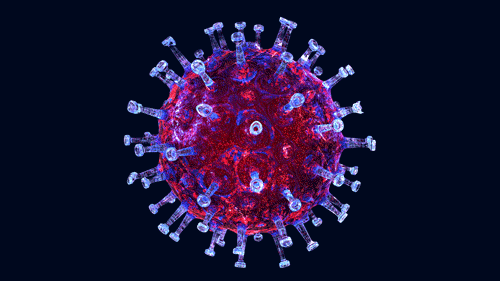

### Data Source: Johns Hopkins University

#### Dataset Link: 
    https://github.com/CSSEGISandData/COVID-19
    2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
    This dataset is updated on daily basis by Johns Hopkins CSSE

### Downloading and installing the necessary packages. 

In [4]:
!pip install pycountry_convert --quiet 
!pip install folium --quiet
!pip install calmap --quiet

In [55]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
import folium 
from folium import plugins
from tqdm.notebook import tqdm as tqdm
import seaborn as sns
from pathlib import Path
import os


import warnings
warnings.filterwarnings('ignore')

### Retrieving data from the source (JHU/Worldometers.info)

In [163]:
Cleaned_data = pd.read_csv("D:\Data Science\Python\Covid-19 Data\COVID-19_LatestData.csv")
Cleaned_data

,#,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,0,World,461652411,6074898,"394,906,322","60,671,191",0,0
1,1,USA,81259094,993757,"56,461,468","23,803,869",967505242,334305317
2,2,India,42998938,516103,"42,450,055","32,780",779754156,1403087655
3,3,Brazil,29432274,655649,"27,968,811","807,814",63776166,215130305
4,4,France,23649615,140440,"22,327,945","1,181,230",246629975,65519286
...,...,...,...,...,...,...,...,...
221,222,Western Sahara,10,1,8,1,0,622306
222,224,Marshall Islands,7,0,7,0,0,59870
223,225,Saint Helena,2,0,2,0,0,6108
224,226,Micronesia,1,0,1,0,0,117074


### Preprocessing(Cleaning Data) 

In [190]:
#Drop the firt row as it's just the combined datase

Cleaned_Data1 = Cleaned_data.drop(0)
# Droping Column "#"
Cleaned_Data1.drop(columns = ['#'], inplace = True)

Cleaned_Data1.head()

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
1,USA,81259094,993757,"56,461,468","23,803,869",967505242,334305317
2,India,42998938,516103,"42,450,055","32,780",779754156,1403087655
3,Brazil,29432274,655649,"27,968,811","807,814",63776166,215130305
4,France,23649615,140440,"22,327,945","1,181,230",246629975,65519286
5,UK,19819810,163095,"18,429,633","1,227,082",492630733,68492797


In [191]:
Cleaned_data[['Country', 'Total Deaths']].head()


,Country,Total Deaths
0,World,6074898
1,USA,993757
2,India,516103
3,Brazil,655649
4,France,140440


In [192]:
Cleaned_data[['Country','Total Deaths']].head()

,Country,Total Deaths
0,World,6074898
1,USA,993757
2,India,516103
3,Brazil,655649
4,France,140440


In [193]:
Cleaned_data[["Country","Total Recovered"]].head()

,Country,Total Recovered
0,World,"394,906,322"
1,USA,"56,461,468"
2,India,"42,450,055"
3,Brazil,"27,968,811"
4,France,"22,327,945"


In [194]:
Active_Cases = Cleaned_data[["Country","Active Cases"]]
Active_Cases

,Country,Active Cases
0,World,"60,671,191"
1,USA,"23,803,869"
2,India,"32,780"
3,Brazil,"807,814"
4,France,"1,181,230"
...,...,...
221,Western Sahara,1
222,Marshall Islands,0
223,Saint Helena,0
224,Micronesia,0


### Removing "," from the ActiveCases Column

In [195]:
Cleaned_Data1.replace(",","", regex = True, inplace = True)

In [198]:
Cleaned_Data1

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
1,USA,81259094,993757,56461468,23803869,967505242,334305317
2,India,42998938,516103,42450055,32780,779754156,1403087655
3,Brazil,29432274,655649,27968811,807814,63776166,215130305
4,France,23649615,140440,22327945,1181230,246629975,65519286
5,UK,19819810,163095,18429633,1227082,492630733,68492797
...,...,...,...,...,...,...,...
221,Western Sahara,10,1,8,1,0,622306
222,Marshall Islands,7,0,7,0,0,59870
223,Saint Helena,2,0,2,0,0,6108
224,Micronesia,1,0,1,0,0,117074


In [199]:
Cleaned_Data1.dtypes

Country            object
Total Cases         int64
Total Deaths        int64
Total Recovered    object
Active Cases       object
Total Tests         int64
Population          int64
dtype: object

### Converting Object Datatype into numeric. As we can see, Total Recovered and Active Cases columns are read as an object Datatype. We need to convert them to numeric value. 

### Use the pd.to_numeric to convert both at the same time! 

In [229]:
Cleaned_Data1[["Total Recovered", "Active Cases"]] = Cleaned_Data1[["Total Recovered", "Active Cases"]].apply(pd.to_numeric)

In [230]:
Cleaned_Data1.dtypes

Country            object
Total Cases         int64
Total Deaths        int64
Total Recovered     int64
Active Cases        int64
Total Tests         int64
Population          int64
dtype: object

In [231]:

Global_ConfirmedCases = Cleaned_Data1[['Country','Total Cases']]
Global_ActiveCases.index = np.arange(1, 227)

fig = px.bar(Global_ConfirmedCases.sort_values('Total Cases',ascending=False)[:10][::-1],x='Total Cases',y='Country',title='Confirmed Cases Worldwide',text='Total Cases', height=900, orientation='h')
fig.show()


In [232]:
Global_DeathCases = Cleaned_Data1[['Country','Total Deaths']]
Global_DeathCases.index = np.arange(1, 226)

fig = px.bar(Global_DeathCases.sort_values('Total Deaths',ascending=False)[:10][::-1],x='Total Deaths',y='Country',title='Deaths Cases Worldwide',text='Total Deaths', height=900, orientation='h')
fig.show()

In [233]:
Cleaned_Data1['Active Cases']

1      23803869
2         32780
3        807814
4       1181230
5       1227082
         ...   
221           1
222           0
223           0
224           0
225           1
Name: Active Cases, Length: 225, dtype: int64

In [234]:
Global_RecoveredCases = Cleaned_Data1[['Country','Total Recovered']]

Global_RecoveredCases.index = np.arange(1, 226)
fig = px.bar(Global_RecoveredCases.sort_values('Total Recovered',ascending=False)[:10][::-1],x='Total Recovered',y='Country',title='Recovered Cases Worldwide',text='Total Recovered', height=900, orientation='h')
fig.show()


In [241]:


Global_ActiveCases = Cleaned_Data1[['Country','Active Cases']]

Global_ActiveCases.index = np.arange(1,226)
fig = px.bar(Global_ActiveCases.sort_values('Active Cases',ascending=False)[:10][::-1],x='Active Cases',y='Country',title='Active Cases Worldwide',text='Active Cases', height=900, orientation='h')
fig.show()



### Let’s determine Covid-19 Mortality Rate.  

In [242]:
Cleaned_Data1

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
1,USA,81259094,993757,56461468,23803869,967505242,334305317
2,India,42998938,516103,42450055,32780,779754156,1403087655
3,Brazil,29432274,655649,27968811,807814,63776166,215130305
4,France,23649615,140440,22327945,1181230,246629975,65519286
5,UK,19819810,163095,18429633,1227082,492630733,68492797
...,...,...,...,...,...,...,...
221,Western Sahara,10,1,8,1,0,622306
222,Marshall Islands,7,0,7,0,0,59870
223,Saint Helena,2,0,2,0,0,6108
224,Micronesia,1,0,1,0,0,117074


In [243]:
flg = Cleaned_Data1.groupby('Country')['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases'].sum().reset_index()

In [244]:
flg

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases
0,Afghanistan,176617,7649,159007,9961
1,Albania,272711,3486,268563,662
2,Algeria,265478,6868,178094,80516
3,Andorra,38794,152,37925,717
4,Angola,98956,1900,96935,121
...,...,...,...,...,...
220,Wallis and Futuna,454,7,438,9
221,Western Sahara,10,1,8,1
222,Yemen,11793,2139,8879,775
223,Zambia,315381,3961,309765,1655


In [248]:
flg['MortalityRate %'] = round((flg['Total Deaths']/flg['Total Cases'])*100, 2)
temp = flg[flg['Total Cases']>100]
temp = temp.sort_values('MortalityRate %', ascending=False)
temp

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,MortalityRate,MortalityRate %
222,Yemen,11793,2139,8879,775,18.14,18.14
193,Sudan,61715,4874,0,0,7.90,7.90
158,Peru,3537488,211619,0,0,5.98,5.98
130,Mexico,5607845,321115,4900680,386050,5.73,5.73
197,Syria,55431,3118,50181,2132,5.63,5.63
...,...,...,...,...,...,...,...
91,Iceland,165365,83,75685,89597,0.05,0.05
22,Bhutan,19435,7,14112,5316,0.04,0.04
144,New Zealand,399342,117,205975,193250,0.03,0.03
46,Cook Islands,476,0,132,344,0.00,0.00


In [262]:
fig = px.bar(temp.sort_values(by="MortalityRate %", ascending=False)[:20][::-1],
             x = 'MortalityRate %', y = 'Country', 
             title='Deaths per 100 Confirmed Cases', text='MortalityRate %', height=800, orientation='h',
             color_discrete_sequence=['darkred']
            )
fig.show()

**This is astonishing and mind boggling at the same time. The people of Yemen's mortality rate is extremely high and it needs to be further invetigated. As a war-torn country, it’s understandable that it might not be easy to get a vaccination to them, but this should not be acceptable by any standard. There is 18% chance of dying from Covid in Yemen, which is as high as 5 times the average Global Mortality Rate registered by WHO. If we ever going to eradicate this disease, vaccinating the underdeveloped countries become a must.**

### Let's check mortality rate for: USA, AUSTRALIA, ETHIOPIA, UK, AND NORWAY

In [281]:
temp.set_index('Country', inplace = True)

In [284]:
temp.loc["Australia"]["MortalityRate"]

0.15

In [285]:
temp.loc["Ethiopia"]["MortalityRate"]

1.6

In [286]:
temp.loc["USA"]["MortalityRate"]

1.22

In [288]:
temp.loc["Norway"]["MortalityRate"]

0.13

In [289]:
temp.loc["UK"]["MortalityRate"]

0.82